# Original Case Study

## Data Science Jobs

# Graphics Analysis

### Gloria Prada Moore


### Question: What reservations are going to be canceled?


The present data set was pulled from https://www.kaggle.com/jessemostipak/hotel-booking-demand
The owner of this data set states that this dasta set contains booking information for a city hotel and resort hotels, and includes information such as when the booking was made, lenght, time of arrival, cancelation, number of guests, and types of guests(Mostipak)
What I want to do with this data set is to predict if a reservation will be canceled or not, this based on the features variables that I am going to define in this analysis

In [18]:
import pandas as pd
import yellowbrick
import numpy as np

In [19]:
data = pd.read_csv("hotel_bookings.csv")

In [20]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:

print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (119390, 32)


Next steps I will check the data and variable types and descriptions

In [22]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [23]:
print("Describe Data")
print(data.describe())

Describe Data
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.0000

In [24]:
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
             hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient       

Next I would like to see whatvariables have missing values, and determine what to do with those missing values (if applies)

In [25]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Variables with **NAN** values are:

    
*Children*

*Country*

*Agent*

*Company*

In [26]:
import matplotlib.pyplot as plt

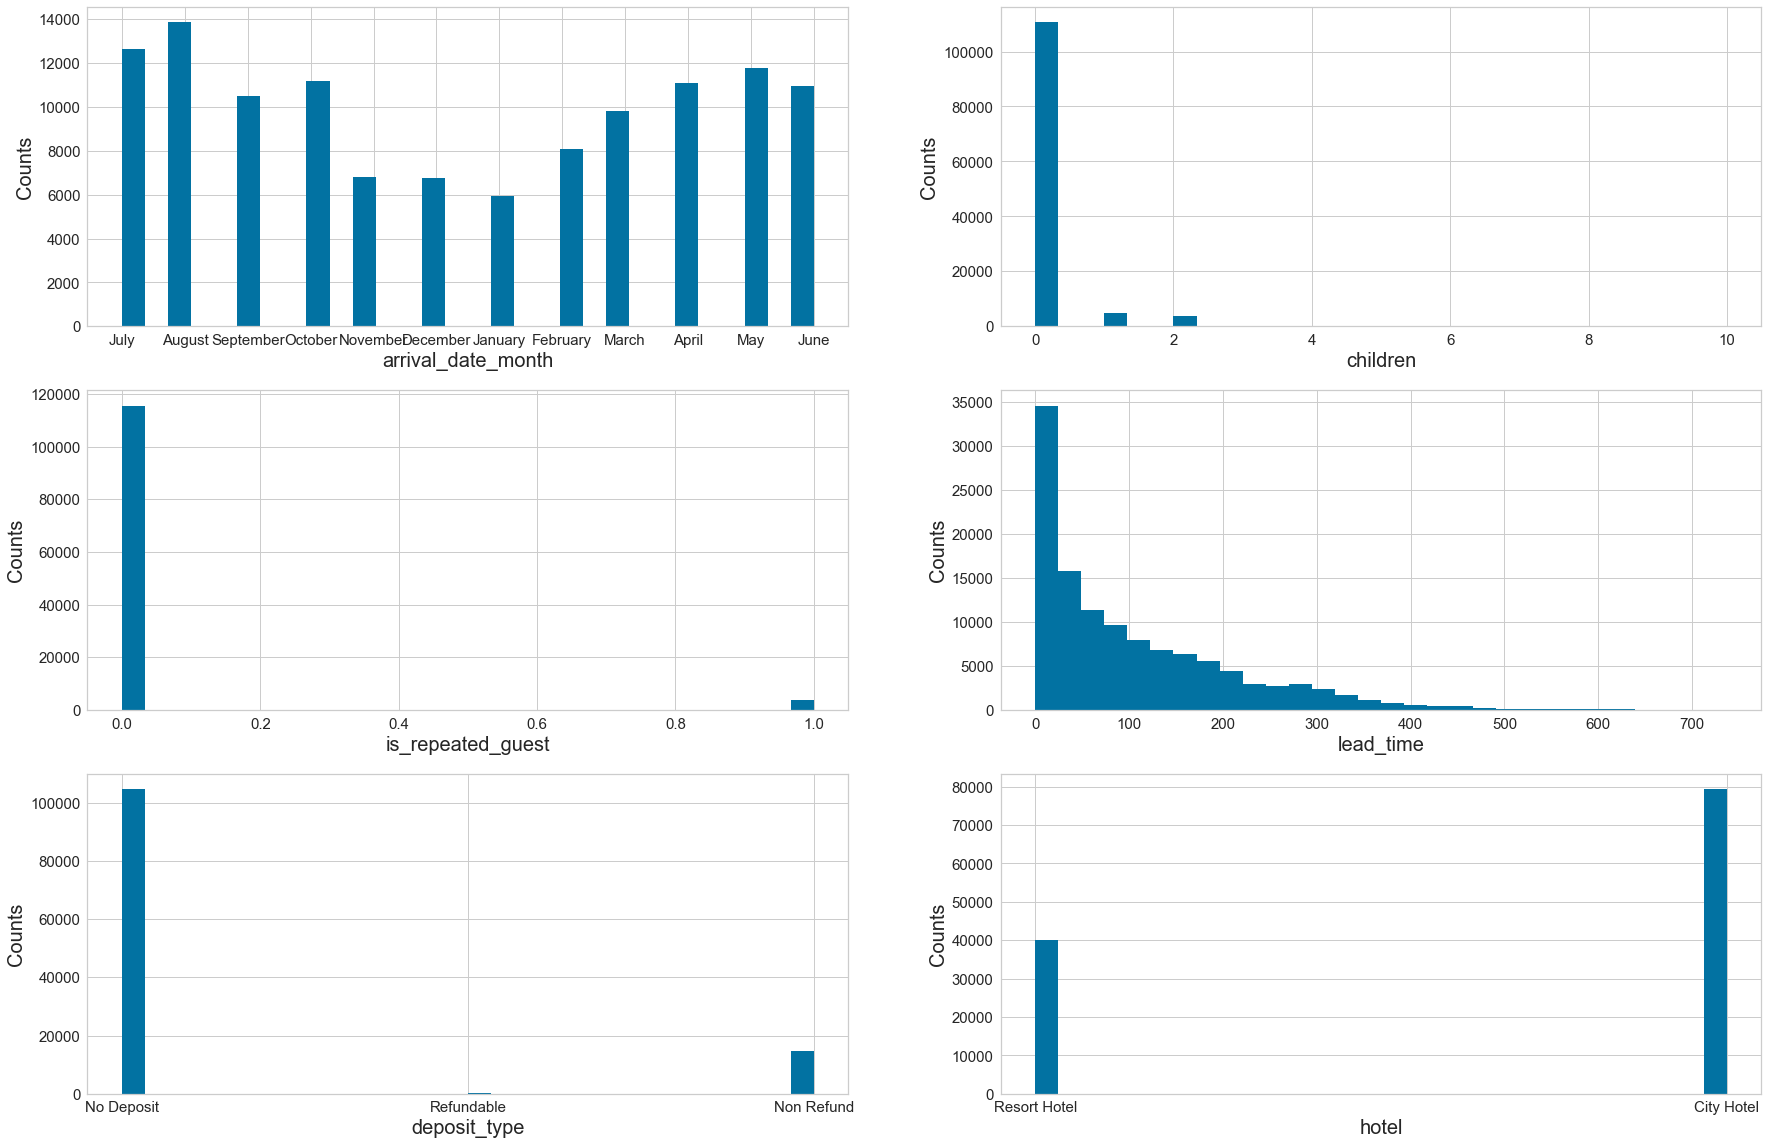

In [36]:
# set up the figure size
plt.rcParams['figure.figsize'] = (30, 20)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# Specify the features of interest
num_features = ['arrival_date_month', 'children', 'is_repeated_guest', 'lead_time', 'deposit_type', 'hotel']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']


# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=30)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

From the previous Histograms we can see the lead_time vairbale that represent the number of days that are between the date of entering the booking in the system and the arrival date, so basically, how many days in advance a guest makes a reservation, this histogram is skewed to the right, and present that most of the guest make reservations wiht less the 100 days previous to their arrival date.
Also we can see that we have more reservations for city hotels htan resort hotels
Most of the reservation does not require a deposit
Most of the guest are new guests for those hotels
Most of the guest travel without children, and those who travel with children, most of them  1 or max 2
Finally for we can see a higher number of bookings for the month of August, and have a "low season" in between November and February

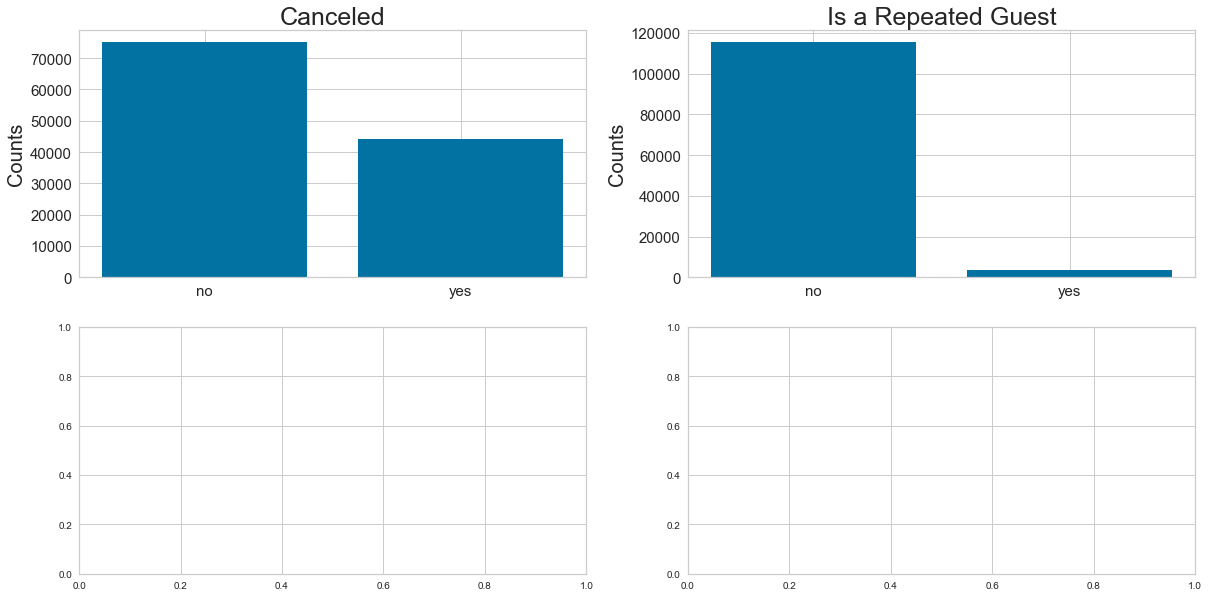

In [51]:
#7:  Barchartse
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Canceled= data.replace({'is_canceled': {1: 'yes', 0: 'no'}}).groupby('is_canceled').size().reset_index(name='Counts')['is_canceled']
Y_Canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}}).groupby('is_canceled').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Canceled, Y_Canceled)
axes[0, 0].set_title('Canceled', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_repeated_guest = data.replace({'is_repeated_guest': {1: 'yes', 0: 'no'}}).groupby('is_repeated_guest').size().reset_index(name='Counts')['is_repeated_guest']
Y_repeated_guest = data.replace({'is_repeated_guest': {1: 'yes', 0: 'no'}}).groupby('is_repeated_guest').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_repeated_guest, Y_repeated_guest)
axes[0, 1].set_title('Is a Repeated Guest', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

plt.show()

From the plots avobe, we can see that the mayority of the guest did not canceled their booking, and also that there are most new guests than guest that already visited the hotel

#### Correlation Analysis

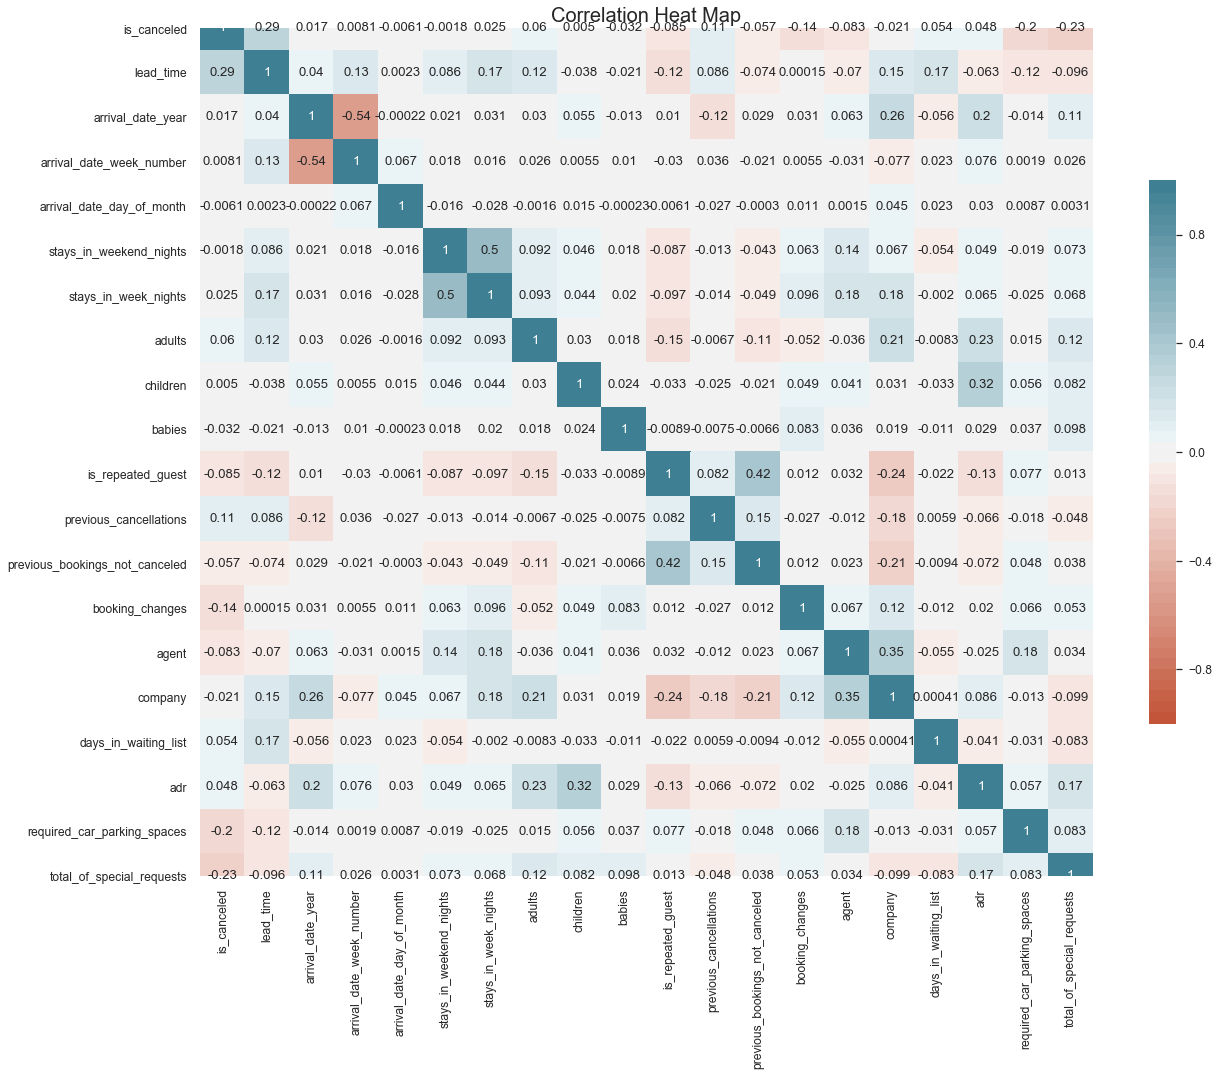

In [159]:
import seaborn as sns

corr = data.corr(method="pearson")
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale= 1.1)
sns.heatmap(corr, annot=True, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 220, n=50), square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heat Map', fontsize = 20)
plt.show()

I used Pearson correlation to get the values for every single feature in the data frame. Checking that the higher positive value correlated with the cancelation rate, would be the lead time **0.29**, what means is that as higher the number of days prior to the arrival date that the booking is made, the higher the number of cancelations

On the other hand we find the total of special requets negative correlated with the cancelation rate **-0.23**, the higher the special request there are less cancelations


But in general the correlation values are low

In [125]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]
labels =[100, 200, 300, 400, 500, 600, 700, 800]
data['leadtime_bins'] = pd.cut(data['lead_time'], bins,labels=labels)

I had to create some bins with the lead time because the data for this feature was to wide to work with single points and the counts of the cancelation cases


I also used the professor code to create some plots with some personal variations

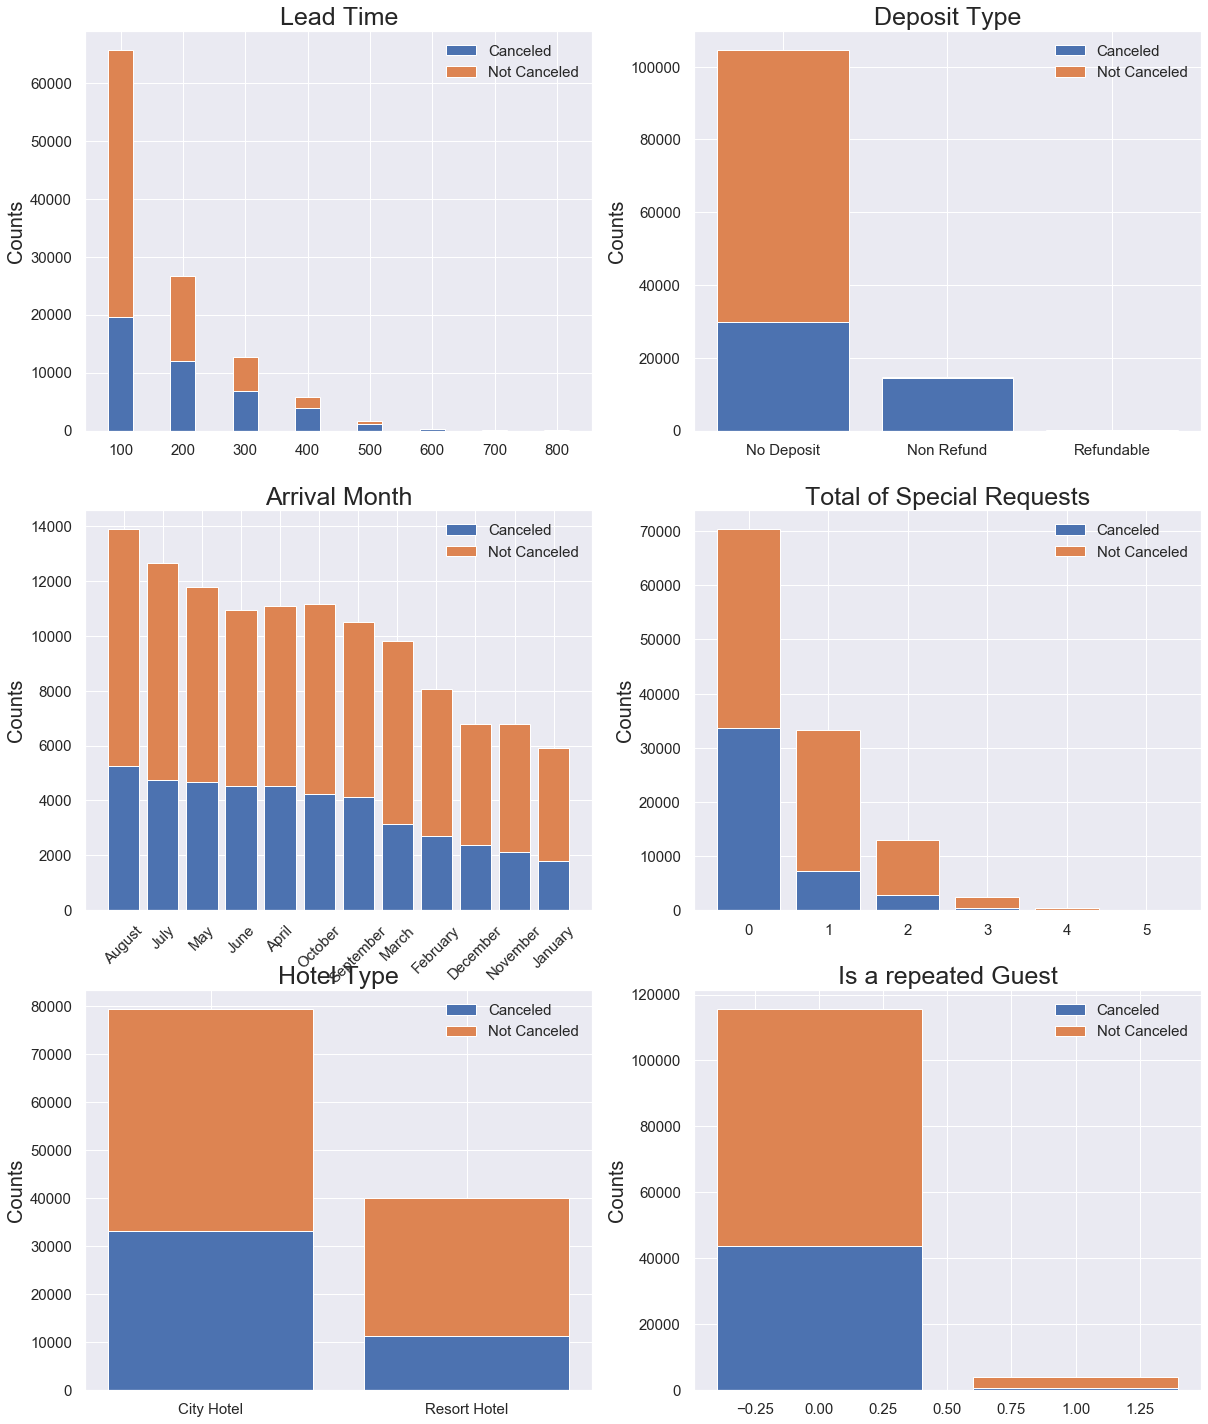

In [157]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 25)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# make the data read to feed into the visulizer
LeadTime_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==1]['leadtime_bins'].value_counts()
LeadTime_not_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==0]['leadtime_bins'].value_counts()
LeadTime_not_canceled = LeadTime_not_canceled.reindex(index = LeadTime_canceled.index)
# make the bar plot
p1 = axes[0, 0].bar(LeadTime_canceled.index, LeadTime_canceled.values, width = 40)
p2 = axes[0, 0].bar(LeadTime_not_canceled.index, LeadTime_not_canceled.values, bottom=LeadTime_canceled.values, width = 40)
axes[0, 0].set_title('Lead Time', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Canceled', 'Not Canceled'), fontsize = 15)

# make the data read to feed into the visualizer
Deposit_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==1]['deposit_type'].value_counts()
Deposit_not_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==0]['deposit_type'].value_counts()
Deposit_not_canceled = Deposit_not_canceled.reindex(index = Deposit_canceled.index)
# make the bar plot
p3 = axes[0, 1].bar(Deposit_canceled.index, Deposit_canceled.values)
p4 = axes[0, 1].bar(Deposit_not_canceled.index, Deposit_not_canceled.values, bottom=Deposit_canceled.values)
axes[0, 1].set_title('Deposit Type', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Canceled', 'Not Canceled'), fontsize = 15)

# make the data read to feed into the visualizer
Arrival_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==1]['arrival_date_month'].value_counts()
Arrival_not_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==0]['arrival_date_month'].value_counts()
Arrival_not_canceled = Arrival_not_canceled.reindex(index = Arrival_canceled.index)
# make the bar plot
p5 = axes[1, 0].bar(Arrival_canceled.index, Arrival_canceled.values)
p6 = axes[1, 0].bar(Arrival_not_canceled.index, Arrival_not_canceled.values, bottom=Arrival_canceled.values, )
axes[1, 0].set_title('Arrival Month', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='y', labelsize=15)
axes[1, 0].tick_params(axis='x', labelsize=15, rotation = 45)
axes[1, 0].legend((p5[0], p6[0]), ('Canceled', 'Not Canceled'), fontsize = 15)


# make the data read to feed into the visualizer
Special_Request_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==1]['total_of_special_requests'].value_counts()
Specia_Request_not_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==0]['total_of_special_requests'].value_counts()
Specia_Request_not_canceled = Specia_Request_not_canceled.reindex(index = Special_Request_canceled.index)


# make the bar plot
p5 = axes[1, 1].bar(Special_Request_canceled.index, Special_Request_canceled.values)
p6 = axes[1, 1].bar(Specia_Request_not_canceled.index, Specia_Request_not_canceled.values, bottom=Special_Request_canceled.values)
axes[1, 1].set_title('Total of Special Requests', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p5[0], p6[0]), ('Canceled', 'Not Canceled'), fontsize = 15)


# make the data read to feed into the visulizer
Hotel_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==1]['hotel'].value_counts()
Hotel_not_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==0]['hotel'].value_counts()
Hotel_not_canceled = Hotel_not_canceled.reindex(index = Hotel_canceled.index)
# make the bar plot
p1 = axes[2, 0].bar(Hotel_canceled.index, Hotel_canceled.values)
p2 = axes[2, 0].bar(Hotel_not_canceled.index, Hotel_not_canceled.values, bottom=Hotel_canceled.values)
axes[2, 0].set_title('Hotel Type', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p1[0], p2[0]), ('Canceled', 'Not Canceled'), fontsize = 15)

# make the data read to feed into the visualizer
Repeated_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==1]['is_repeated_guest'].value_counts()
Repeated_not_canceled = data.replace({'is_canceled': {1: 'yes', 0: 'no'}})[data['is_canceled']==0]['is_repeated_guest'].value_counts()
Repeated_not_canceled = Repeated_not_canceled.reindex(index = Repeated_canceled.index)
# make the bar plot
p3 = axes[2, 1].bar(Repeated_canceled.index, Repeated_canceled.values)
p4 = axes[2, 1].bar(Repeated_not_canceled.index, Repeated_not_canceled.values, bottom=Repeated_canceled.values)
axes[2, 1].set_title('Is a repeated Guest', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)
axes[2, 1].legend((p3[0], p4[0]), ('Canceled', 'Not Canceled'), fontsize = 15)

plt.show()


from these last plots we can see guests that book from 0 to 100 days in advance have higher cancelations, people staying in city hotels have more cancelations as well.


Guests with 0 special requests have more chance to cancel, but this is maybe bacause of the fact that there are mora observations of guest that do not have special requests or because is just more common to fin guests that don't make special requests

Arrival month looks like is random, does not present any trend that we can relate with cancelation

The type of the deposite made present higher cancelatio for those ones that do not make any deposit, this is kind of logical if we think that if we made a deposit we might be affraid to lose the money

In conclusion, there are more plots like scatterplots, maybe some pies to represent percentages of these features and its cancelation relation that i could make in the next few days to be able to analyize better all the data

References

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html
https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv